Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

Data Collection And Preprocessing

In [2]:
df = pd.read_csv("C:/Users/shrut/Downloads/mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.shape

(5572, 2)

Encoding the category data

ham=1
spam=0

In [6]:
df.replace({'Category':{'ham':1,"spam":0}} , inplace=True)

In [7]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Splitting the data into features and target

In [8]:
x = df['Message']
y = df['Category']

In [9]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [10]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [11]:
x_train ,x_test , y_train ,y_test = train_test_split(x , y , test_size=0.2 , random_state=2) 

In [12]:
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((4457,), (1115,), (4457,), (1115,))

Feature Extraction

In [13]:
#transform the text data to feature vectors that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df=1 , stop_words='english' , lowercase='True')
x_train_features= feature_extraction.fit_transform(x_train)
x_test_features= feature_extraction.transform(x_test)

In [14]:
print(x_train_features)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

Traning the model

In [15]:
algo = LogisticRegression()

In [16]:
algo.fit(x_train_features , y_train)

LogisticRegression()

In [17]:
y_train_predict=algo.predict(x_train_features)
y_test_predict=algo.predict(x_test_features)

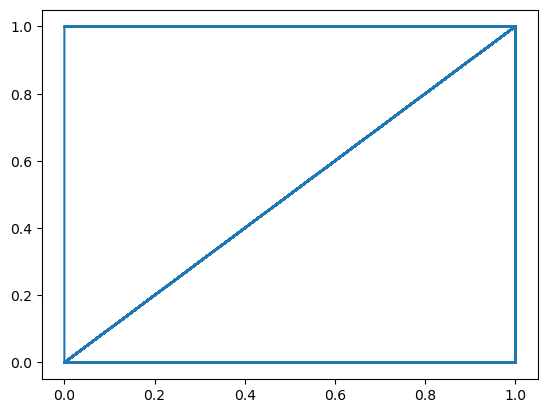

In [18]:
plt.plot(y_train_predict , y_train)

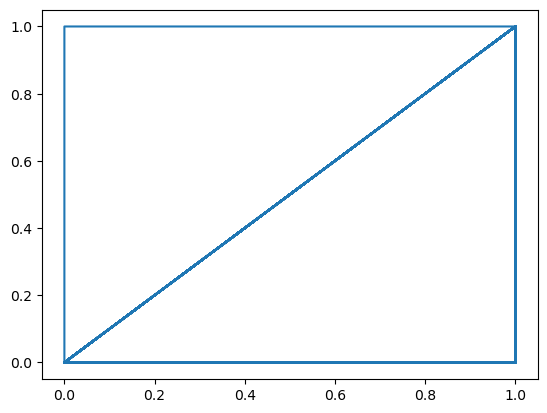

In [19]:
plt.plot(y_test_predict , y_test)

In [20]:
training_score=algo.score(x_train_features , y_train)
print("accuracy on traning data : " ,training_score )

accuracy on traning data :  0.9683643706529056


In [21]:
testing_score=algo.score(x_test_features , y_test)
print("accuracy on testing data : " ,testing_score )

accuracy on testing data :  0.9524663677130045


Making a predictive system

In [22]:
input_mail=["here is my new address -apples&pairs&all that malarky"]
#convert the texy to feature extraction
input_feature_extraction= feature_extraction.transform(input_mail)
#making predictions

preedictions = algo.predict(input_feature_extraction)


if (preedictions[0]==0):
    print("THIS MAIL IS A SPAM MAIL")
else:
    print("THIS MAIL IS A HAM MAIL")

THIS MAIL IS A HAM MAIL
